In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.gridspec as gridspec
from pylab import setp
import matplotlib.ticker as ticker
import math
from __future__ import division

import scipy.stats as stats
#from scipy.special import gamma as Gamma
#from scipy.special import zetac
#from scipy.special import kn as Bessel2
#import scipy.integrate as integrate

%matplotlib inline

In [2]:
%pwd

u'/home/santiago/Dropbox/Euclid-IST/BarPlots/histogramcode'

*List of numpy arrays stored*

In [3]:
ls

BarChartPlots.ipynb             ForecastsSurveysBarPlots_orig.ipynb
ForecastsSurveysBarPlots.ipynb  Vertical_Det_C_barplots.ipynb


In [4]:
# creation of the data
name_list = ['Euclid', 'SKA1',  'SKA2','DESI-ELG'] 
#For GC, SKA1, represents SKA1-SUR, please note this in caption

parslist_str=[r'$\Omega_b h^2$', r'$h$', r'$\Omega_{RR}$', r'$n_s$',r'$\log[10^{10}\mathcal{A}_s]$', r'$m_\nu$']
parslist_str_Lcdm=[r'$\Omega_b h^2$', r'$h$', r'$\Omega_\Lambda$', r'$n_s$',r'$\log[10^{10}\mathcal{A}_s]$', r'$m_\nu$']


colors_list = ['0.5', 'r', 'b', 'g'] #optional
collist2=['Indigo','OrangeRed','SkyBlue', 'ForestGreen', 'DarkGoldenrod', 'Plum', 'Crimson', 'SteelBlue', 'YellowGreen']
#collist3 = ['firebrick', 'limegreen', 'gold' , 'dodgerblue', 'peru','darkorange', 'darkorchid', 'deeppink']
collist4 = ['darkorchid','YellowGreen','dodgerblue','darkorange']
collist3 = ['darkorchid','dodgerblue','darkorange']

In [5]:
cols_dict={name:collist4[i] for i,name in enumerate(name_list)}
cols_dict

{'DESI-ELG': 'darkorange',
 'Euclid': 'darkorchid',
 'SKA1': 'YellowGreen',
 'SKA2': 'dodgerblue'}

In [6]:
#from matplotlib import rcParams
#rcParams.update({'figure.autolayout': False})

def customize_barhBroken(data, width_bar=1, width_space=0.5, break_space=0.08,
                         lims1=[0,100], lims2=[0,100],
                         colors=None, filename='forecast', 
                         parslist=parslist_str, data_title='Legend', legend_cols=2,
                         legend_anchorbox=[0.20, 1.39],
                        tickspacing=[1,20], set_locator="Multiple", maxnlprune=[None,'lower']):
    n_measure = len(data)                   #number of measure per people
    n_people = data[list(data.keys())[0]].size    # number of people

    #some calculation to determine the position of Y ticks labels
    total_space = n_people*(n_measure*width_bar)+(n_people-1)*width_space
    ind_space = n_measure*width_bar
    step = ind_space/2.
    pos = np.arange(step, total_space+width_space, ind_space+width_space)

    # create the figure and the axes to plot the data 
    #fig = plt.figure(figsize=(8,6))
    #ax = fig.add_axes([0.15, 0.15, 0.65, 0.7])  
    fig, (ax,ax2) = plt.subplots(1, 2, sharey=True, figsize=(10,8), facecolor='w')
    # remove top and right spines and turn ticks off if no spine
    almbck = '#333333' #'dimgray'#'#262626'almbck  #almost black
    none = 'None' #'dimgray'#'#262626'almbck  #almost black
    
    ax.spines['right'].set_visible(False)
    ax2.spines['left'].set_visible(False)
    #ax2.spines['right'].set_visible(False)
    #ax.spines['top'].set_visible(False)
    #ax2.spines['top'].set_visible(False)
    ax.xaxis.set_ticks_position('bottom')
    ax2.xaxis.set_ticks_position('bottom')
    #ax.yaxis.set_ticks_position('left')    # ticks position on the right
    # postition of tick out
    #ax2.yaxis.set_ticks_position('right')
    
    tickw=1.0
    
    ax.tick_params(axis='both', direction='out', width=tickw, length=6,
                   labelsize=20, pad=8, colors=almbck, labelcolor=almbck, right='off', left='on')
    ax2.tick_params(axis='both', direction='out', width=tickw, length=6,
                   labelsize=20, pad=8, colors=almbck, labelcolor=almbck, left='off', right='off')
    
    lwax=1.5
    
    ax.spines['left'].set_linewidth(lwax)
    ax2.spines['right'].set_linewidth(lwax)
    ax.spines['bottom'].set_linewidth(lwax)
    ax2.spines['bottom'].set_linewidth(lwax)
    ax.spines['top'].set_linewidth(lwax)
    ax2.spines['top'].set_linewidth(lwax)
    
    ax.spines['left'].set_color(almbck)
    ax2.spines['right'].set_color(almbck)
    ax.spines['bottom'].set_color(almbck)
    ax2.spines['bottom'].set_color(almbck)
    ax.spines['top'].set_color(almbck)
    ax2.spines['top'].set_color(almbck)

    
    plt.subplots_adjust(wspace=break_space)
    lwbar = 1.0
    
    
    # plot the data
    for i,keyword in enumerate(data.keys()):
        if colors == None:
            ax.barh(pos-step+i*width_bar, data[keyword], width_bar, #facecolor='0.4',
                    edgecolor=none, linewidth=lwbar)
            ax2.barh(pos-step+i*width_bar, data[keyword], width_bar, #facecolor='0.4',
                    edgecolor=none, linewidth=lwbar)
        else:
            ax.barh(pos-step+i*width_bar, data[keyword], width_bar, facecolor=cols_dict[keyword],
                    edgecolor=none, linewidth=lwbar, label=keyword)
            ax2.barh(pos-step+i*width_bar, data[keyword], width_bar, facecolor=cols_dict[keyword],
                    edgecolor=none, linewidth=lwbar, label=keyword)
    
    d = .025 # how big to make the diagonal lines in axes coordinates
    # arguments to pass plot, just so we don't keep repeating them
    kwargs = dict(transform=ax.transAxes, color=almbck, linewidth=lwax, clip_on=False)
    kwargs2 = dict(transform=ax2.transAxes, color=almbck, linewidth=lwax, clip_on=False)
    ax.plot((1-d,1+d), (-d,+d), **kwargs)
    ax.plot((1-d,1+d),(1-d,1+d), **kwargs)
    ax2.plot((-d,+d), (1-d,1+d), **kwargs2)
    ax2.plot((-d,+d), (-d,+d), **kwargs2)
  
    #print(kwargs)
    ax.set_yticks(pos)
    # you may want to use the list of name as argument of the function to be more
    # flexible (if you have to add a people)
    
    
    ylab = ax.set_yticklabels(parslist)
    #ha='center', position=(-0.25, 0)
    plt.setp(ax2.get_yticklabels(), visible=False)
    #ax2.set_yticklabels(("","","","",""))
    #ax.xaxis.label.set_color(almbck)
    #ax.yaxis.label.set_color(almbck)
    #ax2.xaxis.label.set_color(almbck)
    #ax2.yaxis.label.set_color(almbck)
        
    
    ax.set_ylim((-width_space, total_space+width_space))
    
    
    lgd = ax2.legend(loc='upper right', bbox_to_anchor=(legend_anchorbox[0], legend_anchorbox[1]),
          ncol=legend_cols, fancybox=True, shadow=True, fontsize=18, title=data_title)
    
    plt.setp(lgd.get_title(),fontsize=18)
    
    ax.set_xlim(lims1[0], lims1[1])
    ax2.set_xlim(lims2[0], lims2[1])
    
    if set_locator=="Multiple":
        ax.xaxis.set_major_locator(ticker.MultipleLocator(tickspacing[0]))
        ax2.xaxis.set_major_locator(ticker.MultipleLocator(tickspacing[1]))
        ax.xaxis.set_minor_locator(ticker.MultipleLocator(tickspacing[0]/2.0))
        ax2.xaxis.set_minor_locator(ticker.MultipleLocator(tickspacing[1]/2.0))
    elif set_locator=="MaxNL":
        ax.xaxis.set_major_locator(ticker.MaxNLocator(tickspacing[0],prune=maxnlprune[0]))
        ax2.xaxis.set_major_locator(ticker.MaxNLocator(tickspacing[1],prune=maxnlprune[1]))
        ax.xaxis.set_minor_locator(ticker.MaxNLocator(tickspacing[1],prune=maxnlprune[1]))
        ax2.xaxis.set_minor_locator(ticker.MaxNLocator(tickspacing[1],prune=maxnlprune[1]))
    
    ax.tick_params(which='minor', axis='x', direction='inout', width=tickw, length=4,
                   colors=almbck)
    ax2.tick_params(which='minor', axis='x', direction='inout', width=tickw, length=4,
                   colors=almbck)
    #ax2.tick_params(which='minor', axis='x', direction='inout', width=tickw, length=4,
                   #colors=almbck)
    #ax2.tick_params(which='minor', axis='y', direction='inout', width=0, length=0,
                   #colors=almbck)
    #ax.xaxis.set_minor_locator(ticker.MaxNLocator(5))
    #labx2 = ax2.get_xticklabels()
    #print(str(labx2[0]))
    #labx2[0] = ""
    #ax2.set_xticklabels(labx2)
    #for a in [ax,ax2]:
    #    print(a.get_xticklabels())
    #    plt.setp(a.get_xticklabels()[0], visible=False)
    
    #ax2.xaxis.set_major_locator(ticker.MultipleLocator(tickspacing[1]))
    
    plt.subplots_adjust(top=0.65)
    plt.subplots_adjust(bottom=0.13)
    plt.subplots_adjust(left=0.23)
    plt.subplots_adjust(right=0.95)
    fig.text(0.6, 0.01, r'$\sigma(\%)$', ha='center', size=25, color=almbck)
    #plt.tight_layout(w_pad=5)
    #plt.savefig(filename+'.png', figsize=(8, 6), dpi=100,pad_inches=0.1,bbox_inches="tight")
    plt.savefig(filename+'.pdf', figsize=(8, 6),pad_inches=0.1,bbox_inches="tight")
    #plt.show()

## GC, LCDM ##

In [7]:
GClinLcdm_data={'Euclid': np.array([8.1, 2.5, 0.83, 2.2, 3.3, 216]),
     'DESI-ELG': np.array([13, 3.9, 1.4, 3.3, 4.7, 313]),
     'SKA1': np.array([77, 25, 7.4, 22, 25, 1631]),
     'SKA2': np.array([5.7, 1.8, 0.52, 1.5, 2.4, 165]),
     }
GClinLcdm_title="Lcdm model, GC-L"


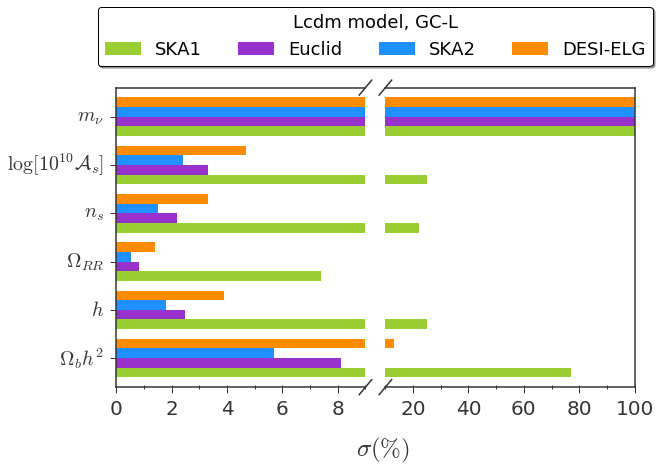

In [8]:
customize_barhBroken(GClinLcdm_data, width_space=1.0, colors=collist4, filename='LCDM-GC-L-4surveys', 
                     data_title=GClinLcdm_title, lims1=[0,9], lims2=[10,100], 
                     legend_cols=4, legend_anchorbox=[1.11, 1.30], tickspacing=[2,20])
#plt.savefig('prova2.png', figsize=(10, 9), dpi=80) 
#plt.savefig('perfBrokenXAxis.png', dpi=80, bbox_extra_artists=(lgd,), bbox_inches='tight') bbox_inches='tight'


In [110]:
GCnonlinLcdm_data={'Euclid': np.array([3.1, 0.92, 0.32, 0.60, 0.52, 8.1]),
     'DESI-ELG': np.array([5.8, 1.7, 0.56, 1.3, 1.1, 13]),
     'SKA1': np.array([19, 5.5, 0.99, 2.7, 2.9, 76]),
     'SKA2': np.array([1.8, 0.53, 0.12, 0.24, 0.27, 4.0])}
GCnonlinLcdm_title="Lcdm model, GC-NL"

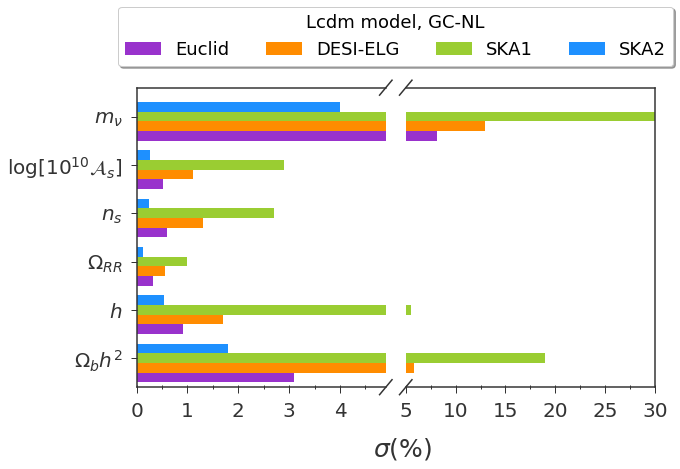

In [111]:
customize_barhBroken(GCnonlinLcdm_data, width_space=1.0, colors=collist4, filename='LCDM-GC-NL-4surveys', 
                     data_title=GCnonlinLcdm_title, lims1=[0,4.9], lims2=[5,30], 
                     legend_cols=4, legend_anchorbox=[1.11, 1.30], tickspacing=[1,5])

## Combination of probes

In [33]:
GCWLlinLcdm_data={'Euclid': np.array([6.6, 2.1, 0.33, 1.5, 2.0, 110]),
     'SKA1': np.array([47, 15, 2.8, 11, 12, 514]),
     'SKA2': np.array([4.5, 1.4, 0.23, 0.95, 1.3, 69])}
GCWLlinLcdm_title="LCDM model, GC-L + WL-L"

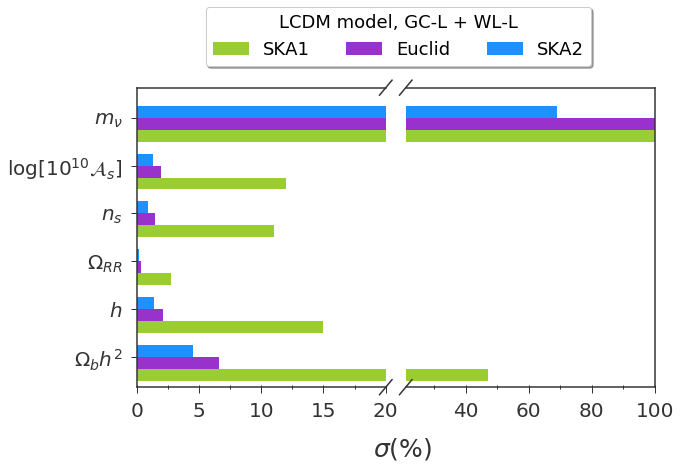

In [52]:
customize_barhBroken(GCWLlinLcdm_data, width_space=1.0, colors=collist3, filename='LCDM-GC-WL-L-3surveys', 
                     data_title=GCWLlinLcdm_title, lims1=[0,20], lims2=[21,100], 
                     legend_cols=4, legend_anchorbox=[0.78, 1.30], tickspacing=[5,20])